# <center>Лабораторная работа 3.</center>
## <center>Модели линейного программирования</center>

*Автор материала: к.т.н., доцент кафедры Фундаметальной информатики и оптимального управления ВолГУ Михаил Алексеевич Харитонов*

**Цель работы:** приобретение практических навыков решения задач линейного программирования c использованием языка Python (библиотеки pulp, cvxopt и SciPy) и Jupyter Notebook.

**Задание:** Заполните ответ в клетках (где написано "Ваш код здесь" или "Ваш ответ здесь"), ответьте на вопросы.



# Часть 1 Python

### Пример 1.1


На мебельной фабрике из листов фанеры вырезают заготовки трех видов. Их должно быть, соответственно, не менее 24, 31 и 18. Существует два способа раскроя листа: 2+5+2 (отходы 12 см.) и 6+4+3 (отходы 16 см.). Сколько листов и как нужно раскроить, чтобы минимизировать отходы?

**Решение.**

Пусть

$x_{1} $ - количество листов, раскроенных первым способом;

$x_{2} $- количество листов, раскроенных вторым способом;

При первом способе раскроя получают 2 заготовки первого вида, 5 заготовок второго вида и 2 заготовки третьего вида. При втором способе раскроя получают 6 заготовок первого вида, 4 заготовки второго вида и 3 заготовки третьего вида.  Так как их должно быть не менее 24, 31 и 18 соответственно, имеем:

$$2x_{1} +6x_{2} \ge 24, \,\,5x_{1} +4x_{2} \ge 31,\,\, 2x_{1} +3x_{2} \ge 18.$$


Дополним ограничения условием неотрицательности для листов, необходимых для раскроя:

$$x_{1} \ge 0, \,\,x_{2} \ge 0.$$

Описанные выше ограничения представляют собой множество $G$ -- область допустимых решений.
$$G=\{2x_{1} +6x_{2} \ge 24, \,\,5x_{1} +4x_{2} \ge 31,\,\, 2x_{1} +3x_{2} \ge 18, \,\, x_{1} \ge 0, \,\,x_{2} \ge 0\}.$$

Составим целевую функцию. Так как нам необходимо минимизировать отходы, причем при первом способе раскроя отходы составляют 12 см. с листа, а при втором -- 16 см. с листа, получаем:


\begin{equation*}
f(x_{1} ,x_{2} )=12x_{1} +16x_{2} \to \mathop{\min }\limits_{G}.
\end{equation*}


Text(0, 0.5, '$x_2$')

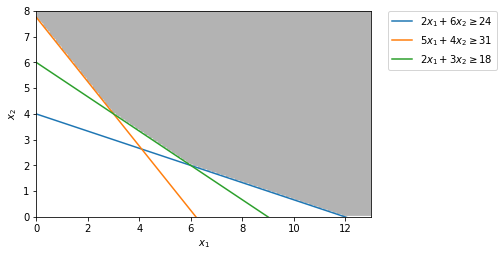

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((6*y>=24-2*x) & (4*y>=31-5*x) & (3*y>=18-2*x) & (x>=0)&(y>=0)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
x = np.linspace(0, 16, 2000)
# y >= 2
y1 = 24/6.0-2*x/6.0
# 2y <= 25 - x
y2 =31/4.0-5*x/4.0
# 4y >= 2x - 8 
y3 = 18/3.0-2*x/3.0
for c in range(0,115,15):
  y4 = (c-12*x)/16.0
 # plt.plot(x, y4, label=r'$12x_{1} +16x_{2} = c$')


# Make plot
plt.plot(x, y1, label=r'$2x_{1} +6x_{2} \geq 24$')
plt.plot(x, y2, label=r'$5x_{1} +4x_{2} \geq 31$')
plt.plot(x, y3, label=r'$2x_{1} +3x_{2} \geq 18$')
plt.xlim(0,13)
plt.ylim(0,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

## Библиотека SciPy (функция linprog)


В библиотеке SciPy (Release 1.7.1 August 01, 2021) для решения задач линейного программирования используется функция `linprog`, которая позволяет решать задачи  вида:
$$
  c^T x\to \min, A \cdot x\leq b, A_{eq} \cdot x= b_{eq}, l_b\leq x \leq u_b,
$$
где 
 $c$ --- вектор-столбец коэффициентов целевой функции (размерность $n$);

 $A$  --- матрица линейных ограничений в форме неравенств (размерность $k \times n$);

 $b$ --- вектор-столбец правых частей ограничений в форме неравенств  (размерность $k$);

 $A_{eq}$  - матрица линейных ограничений в форме равенств (размерность $m-k \times n$);

 $b_{eq}$ - вектор-столбец правых частей ограничений в форме равенств  (размерность $m-k$);

  $l_b$ - вектор-столбец --- нижняя оценка $x$ (размерность $n$);

 $u_b$ - вектор-столбец --- верхняя оценка $x$ (размерность $n$);



Синтаксис обращения к функции `linprog` зависит от количества входных и выходных аргументов функции:
```
scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, callback=None, options=None, x0=None)
```
*   `bounds` - последовательность пар (мин., макс.) для каждого элемента вектора $x$, определяющая минимальное и максимальное значения данной переменной .  По умолчанию границы равны (0, None).


*   `callback` - содержит следующие параметры:

   *  x [1-D array] --- вектор оптимального решения.

   *     fun [float]  --- оптимальное значение целевой функции.

    *    success [bool] --- истинно, когда алгоритм завершился успешно.

    *   status [int] --- целое число, представляющее статус алгоритма.

      0.   Оптимизация идет штатно.
      1.   Достигнут предел итераций.
      2.   Задача неразрешима.
      3.   Задача неорганиченна.
      4.   Возникли вычислительные трудности.

   *   nit [int] --- номер текущей итерации.
   *   message [str] --- строковый дескриптор статуса алгоритма.






### Пример (LP SciPy)



С помощью `linprog` найти решение следующей задачи линейного программирования

\begin{eqnarray*}
f(x)=29x_1+45x_2\to \max\limits_{G},\\
 G=\left\{x_1-x_2-3x_3\leq 5,\quad
 2x_1-3x_2-7x_3+3x_4\geq 10,\\ 
 2x_1+8x_2+x_3=60,\quad
 4x_1+4x_2+x_4=60,\\\
 0 \leq x_1 \leq  6,\quad
 x_3 \geq -3 \right\}
\end{eqnarray*}

Так как данная задача на поиск максимума линейной функции, а `linprog` используется для поиска минимима, поэтому умножим коэфициенты целевой функции на -1.

Целевая функция будет иметь вид $$\hat{f}(x)=-29\cdot x_1-45\cdot  x_2+0\cdot  x_3+0\cdot  x_4\to \min, $$
а вектор $c=(-29,-45, 0, 0)^T$.
 
 Ограничения в форме неравенств должны быть со знаком $\leq$, поэтому домножим второе ограничение на -1.

Т.о. ограничения в форме неравенств будут иметь вид:
\begin{eqnarray*}
 x_1-x_2-3x_3\leq 5,\\
 -2x_1+3x_2+7x_3-3x_4\leq -10,\\ 
\end{eqnarray*}
Данные ограничения можно записать в матричной форме
$$A\cdot x \leq b,$$
где
$A =
\begin{pmatrix}
1 & -1 & -3 & 0\\
-2 & 3 & 7 & -3
\end{pmatrix}$, $b=\begin{pmatrix}
5\\
-10
\end{pmatrix}$.

Запишем ограничения в форме равенств
\begin{eqnarray*}
  2x_1+8x_2+x_3=60,\\
 4x_1+4x_2+x_4=60.\\
\end{eqnarray*}
Данные ограничения можно записать в матричной форме
$$A_{eq}\cdot x \leq b_{eq},$$
где
$A_{eq} =
\begin{pmatrix}
2 & 8 & 1 & 0\\
4 & 4 & 0 & 1
\end{pmatrix}$, $b_{eq}=\begin{pmatrix}
60\\
60
\end{pmatrix}$.

Давайте рассмотрим отдельные ограничения неравенства на отдельные переменные, которые можно использовать с помощью аргумента `bounds`. В документации `linprog` значение по умолчанию для границ равно (0, None), что означает, что нижняя граница для каждого решения переменная равна 0, а верхняя граница каждой переменной решения --- бесконечность.


In [2]:
pip install numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 8.0 MB/s eta 0:00:000m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from scipy.optimize import linprog
c = np.array([-29.0, -45.0, 0.0, 0.0])
A = np.array([[1.0, -1.0, -3.0, 0.0],
[-2.0, 3.0, 7.0, -3.0]])
b = np.array([5.0, -10.0])
A_eq = np.array([[2.0, 8.0, 1.0, 0.0],
[4.0, 4.0, 0.0, 1.0]])
b_eq = np.array([60.0, 60.0])
x1_bounds =  (0, 6.0)
x2_bounds = (0, None)
x3_bounds =  (-3.0, None)
x4_bounds = (0, None)
bounds = [x1_bounds, x2_bounds, x3_bounds, x4_bounds]
result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq,bounds=bounds)
print(result)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -453.7826086956522
              x: [ 6.000e+00  6.217e+00 -1.739e+00  1.113e+01]
            nit: 3
          lower:  residual: [ 6.000e+00  6.217e+00  1.261e+00  1.113e+01]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [ 0.000e+00        inf        inf        inf]
                 marginals: [-1.530e+01  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-5.870e+00 -0.000e+00]
        ineqlin:  residual: [ 0.000e+00  2.891e+01]
                 marginals: [-1.957e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


Получили, что минимальное значение целевой функции $$\hat{f}^*=\hat{f}(x^*)=-453.782, $$ $$x^*=(6, 6.2173913, -1.73913043, 11.13043478)^T.$$

Так как $\hat{f}=-f$, то  $f^*=453.782$.

## Задание 2

С помощью `linprog` найти решение следующей задачи линейного программирования

\begin{eqnarray*}
f(x)=-\frac{3}{4}x_1+20x_2-\frac{1}{2}x_3+6x_4\to \max\limits_{G},\\
G=\left\{\frac{1}{4} x_1-8 x_2-x_3+9x_4+x_5=0,\\
\frac{1}{2} x_1-12 x_2-\frac{1}{2}x_3+3x_4+x_6= 0, \\
x_3+3x_4+x_7= 0\right\}
\end{eqnarray*}

In [ ]:
#Ваш код здесь

# OR-Tools (Google's Operations Research tools)

Основные шаги в решении задачи линейного программирования с использованием обертки OR-Tools.


0. Установка библиотек.

```
pip install ortools
```

1. Импорт необходимых библиотек.

```
from ortools.linear_solver import pywraplp
```

2. Объявление солвера. 

pywraplp — это оболочка Python для базового решателя C++. 
Аргумент solver_id указывает, что для задачи линейного программирования будет использован солвер GLOP .

```
solver_id = "GLOP"
solver = pywraplp.Solver.CreateSolver(solver_id)

```

3. Создание переменных.

Если нужно создать одну перменную $x$:

```
x = solver.type_variable (min_value, max_value, name_variable)
```
где

    type_variable - тип переменной (IntVar - целочисленный, NumVar - вещественный, BoolVar - булевы),
    min_value - минимальное возможное значение переменной,
    max_value - максимальное возможное значение переменной,
    name_variable - имя переменной.


Если нужно создать вектор переменных ( многомерные вектора создаются с использование сложенных циклов)
```
x_string = ['x'+str(i) for i in range(1, n+1)]
x = [solution.NumVar(0, solution.infinity(), i) for i in x_string]
```
Например,
```
x_3 = solver.NumVar(-3, solver.infinity(), "x3")
x_4 = solver.NumVar(- solver.infinity(), solver.infinity(), "x4")
```

4. Создание ограничений.

Ограничения задачи можно добавлять по одному

```
solver.Add(x_1 - x_2 - 3 * x_3 <= 5)

solver.Add(4 * x_1 + 4 * x_2 + x_4 == 60)
```
или сразу все, если задача записана в матричном виде
```
for r in range(len(b_eq)):
    solver.Add(sum(a_eq[r][u] * x[u] for u in range(len(x))) == b_eq[r])

for r in range(len(b)):
    solver.Add(sum(a[r][u] * x[u] for u in range(len(x))) <= b[r])
```

5. Создание целевой функции.
Если задача на максимум - solver.Maximize(), если на минимум - solver.Minimize.

```
solver.Maximize(29 * x_1 + 45 * x_2)
```
или в матричном виде
```
solver.Maximize(sum(c[i] * x[i] for i in range(len(x))))      
```

6. Вызов солвера.

```
status = solver.Solve()
```

7. Отображение результаты.

Если статус солвера сопадает с оптимальным, то  решение найдено. Можно вывести значение целевой функции и переменных.
Иначе, задача не имеет решения.

```
if status == pywraplp.Solver.OPTIMAL:
    print("Objective value =", solver.Objective().Value())
    print("x_1 =", x_1.solution_value())
    print("x_2 =", x_2.solution_value())
    print("x_3 =", x_3.solution_value())
    print("x_4 =", x_4.solution_value())

else:
    print("The problem does not have an optimal solution.")
    
```

или в матричном виде
```
x_optimal = np.array([])
for i in x:
    x_optimal = np.append(x_optimal, i.solution_value())
```


### Пример


\begin{eqnarray*}
f(x)=29x_1+45x_2\to \max\limits_{G},\\
 G=\left\{x_1-x_2-3x_3\leq 5,\quad
 2x_1-3x_2-7x_3+3x_4\geq 10,\\ 
 2x_1+8x_2+x_3=60,\quad
 4x_1+4x_2+x_4=60,\\\
 0 \leq x_1 \leq  6,\quad
 x_3 \geq -3 \right\}
\end{eqnarray*}

In [15]:
pip install ortools


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Скалярный случай

In [14]:

from ortools.linear_solver import pywraplp
solver_id = "GLOP"
solver = pywraplp.Solver.CreateSolver(solver_id)


x_1 = solver.NumVar(0, 6, "x1")
x_2 = solver.NumVar(- solver.infinity(), solver.infinity(), "x2")
x_3 = solver.NumVar(-3, solver.infinity(), "x3")
x_4 = solver.NumVar(- solver.infinity(), solver.infinity(), "x4")


solver.Add(x_1 - x_2 - 3 * x_3 <= 5)
solver.Add(2 * x_1 - 3 * x_2 - 7 * x_3 + 3 * x_4 >= 10)
solver.Add(2 * x_1 + 8 * x_2 + x_3 == 60)
solver.Add(4 * x_1 + 4 * x_2 + x_4 == 60)

solver.Maximize(29 * x_1 + 45 * x_2)

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print("Objective value =", solver.Objective().Value())
    print("x_1 =", x_1.solution_value())
    print("x_2 =", x_2.solution_value())
    print("x_3 =", x_3.solution_value())
    print("x_4 =", x_4.solution_value())


else:
    print("The problem does not have an optimal solution.")


Objective value = 453.78260869565224
x_1 = 6.0
x_2 = 6.217391304347828
x_3 = -1.739130434782609
x_4 = 11.130434782608685


#### Матричный случай

In [ ]:
c = np.array([29.0, 45.0, 0.0, 0.0])

a = np.array([
    [1.0, -1.0, -3.0, 0.0],
    [-2.0, 3.0, 7.0, -3.0],
    [1.0,  0.0, 0.0,  0.0],
    [-1.0, 0.0, 0.0,  0.0],
    [0.0,  0.0, -1.0, 0.0]
])

b = np.array([5.0, -10.0, 6, 0, 3])

a_eq = np.array([
    [2.0, 8.0, 1.0, 0.0],
    [4.0, 4.0, 0.0, 1.0]
])

b_eq = np.array([60.0, 60.0])

In [25]:
from ortools.linear_solver import pywraplp
solver_id = "GLOP"
solver = pywraplp.Solver.CreateSolver(solver_id)

n = len(c)
x_string = ['x'+str(i) for i in range(1, n+1)]
x = [solver.NumVar(-solver.infinity(), solver.infinity(), i) 
     for i in x_string]

for r in range(len(b_eq)):
    solver.Add(sum(a_eq[r][u] * x[u] 
                   for u in range(n)) == b_eq[r])

for r in range(len(b)):
    solver.Add(sum(a[r][u] * x[u] 
                   for u in range(n)) <= b[r])
    
solver.Maximize(sum(c[i] * x[i] 
                    for i in range(n)))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print("Objective value =", solver.Objective().Value())
    x_optimal = np.array([])
    for i in x:
        x_optimal = np.append(x_optimal, i.solution_value())
    print(x_optimal)

else:
    print("The problem does not have an optimal solution.")


Objective value = 453.78260869565224
[ 6.          6.2173913  -1.73913043 11.13043478]


## Часть 2 Решение задач

1.  Для производства изделий А и В мастерская располагает необходимыми деталями двух видов: Д1 в количестве 80 штук и Д2 в количестве 60 штук.
Для производства одного изделия А требуется одна деталь Д1 и одна деталь Д2;
для производства одного изделия В требуется две детали  Д1 и одна деталь Д2.
Составить оптимальный план производства по доходу, если доход от продажи одного изделия А составляет 3 д.е., а от продажи одного изделия В --- 4 д.е.

2.   Для изготовления изделий двух видов имеется 100 кг. металла. На изготовление одного изделия первого вида расходуется 2 кг. металла, а на изготовление одного изделия второго вида требуется 4 кг. Составить план производства, обеспечивающий получение наибольшего дохода от продажи изделий, если доход от продажи каждого изделия первого вида --- 3 д.е., а от каждого изделия второго вида --- 2 д.е. Причем, изделий первого вида требуется изготовить не более 40 штук, а изделий второго вида --- не более 20 штук.

3.  Решить задачу линейного программирования графическим методом
\begin{eqnarray*}
f=x_{1} +5x_{2}  \to \max\limits_D, \\ 
D= \left\{ 4x_{1} +3x_{2} \le 12, \quad
3x_{1} +2x_{2} \ge 6, \quad
-6x_{1} +7x_{2} \le 14, \\
2x_{1} -3x_{2} \le 5,
x_{1} \ge 0,\; x_{2} \ge 0 \right\}.
\end{eqnarray*}
4.  Решить задачу линейного программирования графическим методом
\begin{eqnarray*}
f=7x_{1} +5x_{2}  \to \min\limits_D,  \\ 
D= \left\{3x_{1} +8x_{2} \ge 24, \quad -7x_{1} +3x_{2} \le 21,\\ 5x_{1} +4x_{2} \ge 20,\quad x_{2} \le 8,\quad x_{1} \ge 0, \quad x_{2} \ge 0 \right\}.
\end{eqnarray*}
5.  Решить задачу линейного программирования симплекс методом
\begin{eqnarray*}
f=x_{1} +3x_{2}-2x_3+5  \to \max\limits_D, \\ 
D= \left\{ 3x_{1} +x_{2}+3x_3 \le 11, \quad
x_{1} +3x_{2}+8x_3 \le 9, \quad
2x_{1} +5x_{2}+6x_3 \le 16, \quad 
x_{1} \ge 0,\quad  x_{2} \ge 0,\quad x_{3} \ge 0  \right\}.
\end{eqnarray*}

6.  Решить задачу линейного программирования симплекс методом
\begin{eqnarray*}
f=4x_{1} +2x_{2}-3x_3+6  \to \max\limits_D, \\ 
D= \left\{ 5x_{1} -x_{2}+3x_3 \le 10, \quad
4x_{1} - x_{2}+8x_3 \le 12, \quad
2x_{1} -5x_{2}+6x_3 \le 22, \quad 
x_{1} \ge 0,\quad  x_{2} \ge 0,\quad x_{3} \ge 0  \right\}.
\end{eqnarray*}

7.  Для задачи линейного программирования
\begin{eqnarray*}f(x)=x_1+2x_2-x_3\to \max\limits_D, \\ 
D= \left\{
x_{1} +2x_{2} + 3 x_3\geq 12, \quad 
4x_{1} +2x_{2}+x_3 \leq 24, \\
4x_{1} +6x_{2}+2x_3 = 32, \quad
x_{1} \ge 0,\quad  x_{2} \ge 0,\quad x_{3} \ge 0 
\right\}.
\end{eqnarray*}
найти неотрицательный начальный опорный план методом искусственного базиса.

7.  Заменой свести следующую задачу к задаче линейного программирования и найти неотрицательный опорный план

\begin{eqnarray*}F=\frac{2x_1-x_2}{3x_1+x_2}  \to \max\limits_D, \\ 
D= \left\{ x_{1} +2x_{2} = 11, \quad
  x_1-x_2=8, \\
  -x_1+3x_2=9, \quad 
 x_{1} \ge 0,\quad  x_{2} \ge 0 \right\}.
\end{eqnarray*}

8. Доказать, что множество планов основной задачи линейного программирования является выпуклым (если оно не пусто).
\item Привести к канонической форме следующую задачу линейного программирования. Определить, какие переменные являются базисными, найти начальное опорное
решение и начальное значение целевой функции:
\begin{equation*}
\begin{array}{l} {F=6x_1+8x_2+x_3 \to \max} \\
 {\left\{\begin{array}{l} {x_1+x_2+x_3\geq3,} \\
  {x_1+2x_2\leq4} \\
    {x_1 \ge 0, x_2 \ge 0, x_3 \ge 0} \end{array}\right. } \end{array}
\end{equation*}

9.Привести к канонической форме следующую задачу линейного программирования. Определить, какие переменные являются базисными, найти начальное опорное
решение и начальное значение целевой функции:
\begin{equation*}
\begin{array}{l} {F=6x_1+8x_2-x_3 \to \max,} \\
 {\left\{\begin{array}{l} {12x_1+x_2+2x_3\leq3,} \\
  {x_1+2x_2\geq4} \\
    {x_1 \ge 0, x_2 \ge 0, x_3 \ge 0} \end{array}\right. } \end{array}
\end{equation*}



10. Решить задачу линейного программирования симплекс-методом:
 \begin{equation*}\begin{array}{l} {-4x_1+2x_3\to \max} \\
 {\left\{\begin{array}{l} {x_3\leq 3} \\
  {5x_1+2x_2\leq4} \\
    {x_j \ge 0, \overline{j=1,3}}
    \end{array}\right. } \end{array}\end{equation*}

11. Решить задачу линейного программирования симплекс-методом:
 \begin{equation*}\begin{array}{l} {2x_1+2x_3+2\to \max} \\
 {\left\{\begin{array}{l}
  {2x_1+x_2+x_3\leq13} \\
   {2x_1-5x_2+4x_3\leq19}\\
    {x_j \ge 0, \overline{j=1,3}}
    \end{array}\right. } \end{array}\end{equation*}

12. Решить задачу линейного программирования симплекс-методом:
 \begin{equation*}\begin{array}{l} {-3x_1+4x_3+2\to \max} \\
 {\left\{\begin{array}{l}
  {3x_1+x_2\leq7} \\
   {4x_1+2x_2+3x_3\leq18}\\
    {x_j \ge 0, \overline{j=1,3}}
    \end{array}\right. } \end{array}\end{equation*}

13.  Решить задачу линейного программирования симплекс-методом:
 \begin{equation*}\begin{array}{l} {x_1+4x_2+3x_2-2\to \max} \\
 {\left\{\begin{array}{l}
  {x_1-3x_2+2x_3\leq4} \\
   {x_1-x_2+2x_3\leq5}\\
    {x_j \ge 0, \overline{j=1,3}}
    \end{array}\right. } \end{array}\end{equation*}

14.  Решить задачу линейного программирования симплекс-методом:
 \begin{equation*}\begin{array}{l} {3x_1+2x_3-x_6\to \max} \\
 {\left\{\begin{array}{l}
  {2x_1+x_2-3x_3+6x_6=18} \\
   {-3x_1+2x_3+x_4-2x_6=24}\\
      {x_1+3x_3+x_5-4x_6=36}\\
    {x_j \ge 0, \overline{j=1,6}}
    \end{array}\right. } \end{array}\end{equation*}





#Часть 3 Теория

## Теоретический минимум по методам оптимизации

Необходимо ответить без подготовки не менее, чем на 4 вопроса.

1.    Перечислите формы задач линейного программирования?
2.    Какая форма задачи линейного программирования называется общей?
3.    Какая форма задачи линейного программирования называется канонической?
4.    Какая форма задачи линейного программирования называется стандартной?
5.    Какая функция называется целевой для задачи линейного программирования?
6.    Что такое план задачи линейного программирования?
7.    Какое множество называется выпуклым?
8.    Какая точка выпуклого множества называется угловой?
9.    Какой план задачи линейного программирования называется опорным?
10.   Какой план задачи линейного программирования называется невырожденным?
11.   Может ли целевая функция задачи линейного программирования принимать максимальное значение более чем в одной вершине многогранника решений?
12.   Могут ли ограничения в задаче линейного программирования быть строгими ($>$ или $<$)?
13.   В каком случае необходимо применять метод искусственного базиса?


## Теоретический минимум python

1.  Каким образом можно задать ограничение $3 \le x_3 \le 5 $ при решении задачи линейного программирования с помощью функции linprog?
2.  Каким образом можно задать ограничение $2x_1+ 4x_4-3 x_3+x_4 \ge 12 $ при решении задачи линейного программирования с помощью функции linprog?
3. Для каких целей используется параметр bounds в функции linprog?
4. В чем разница параметров A_ub и A_eq  в функции linprog?
5. Каким образом можно задать ограничение $5 \le x_3 \le +\infty $ при решении задачи линейного программирования с помощью OR-Tools на языке python?
6.  Каким образом можно задать ограничение $2x_1 - 4x_4-3 x_3+x_4 \ge 12 $ при решении задачи линейного программирования с помощью OR-Tools на языке python?
7. Как создаются переменные для задачи линейного программирования с помощью OR-Tools на языке python?
8. В чем различие создания целочисленной и вещественной переменной в OR-Tools на языке python?
9. Как проверить найден ли оптимальный план задачи линейного программирования в в OR-Tools на языке python?
10. Что делает эта команда solver.NumVar(0, 6, "x1") в OR-Tools на языке python?
11. Как создаются ограничения для задачи линейного программирования в OR-Tools на языке python?
12. Как создается целевая функция задачи линейного программирования в OR-Tools на языке python?
13. Как создаются ограничения равенства задачи линейного программирования в OR-Tools на языке python?
14. Как создаются ограничения неравенства задачи линейного программирования в OR-Tools на языке python?
15. Поясните, почему отличаются матрицы $a$ и вектора $b$ для решения одного примера при использовании linprog и OR-Tools?





